### Step 1: Load the Cleaned Dataset
We begin by loading the cleaned dataset generated in **Week 1** after preprocessing.  
This ensures we are working with a dataset that has no missing values and is ready for ML model training.


In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [3]:
# Step 2: Load the cleaned dataset from Week 1
data = pd.read_csv("Cleaned_Air_Pollution_Data.csv")

print("Data shape:", data.shape)
print("Columns:", list(data.columns))
data.head()


Data shape: (12865, 17)
Columns: ['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'City_encoded']


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,City_encoded
0,Ahmedabad,2015-01-01,73.24,141.54,0.92,18.22,17.15,20.36,0.92,27.64,133.36,0.00,0.02,0.00,209.0,Poor,0
1,Ahmedabad,2015-01-02,73.24,141.54,0.97,15.69,16.46,20.36,0.97,24.55,34.06,3.68,5.50,3.77,209.0,Poor,0
2,Ahmedabad,2015-01-03,73.24,141.54,17.40,19.30,29.70,20.36,17.40,29.07,30.70,6.80,16.40,2.25,209.0,Poor,0
3,Ahmedabad,2015-01-04,73.24,141.54,1.70,18.48,17.97,20.36,1.70,18.59,36.08,4.43,10.14,1.00,209.0,Poor,0
4,Ahmedabad,2015-01-05,73.24,141.54,22.10,21.42,37.76,20.36,22.10,39.33,39.31,7.01,18.89,2.78,209.0,Poor,0


### Step 3: Define Features (X) and Target (y)
- Target: `AQI`
- Features: all numeric pollutant columns (exclude `City`, `Date`, and `AQI_Bucket` because they are not numeric for now).


In [5]:
X = data.drop(columns=['City', 'Date', 'AQI_Bucket', 'AQI'], errors='ignore')
y = data['AQI']

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (12865, 13)
Target shape: (12865,)


### Step 4: Handle Missing Values
- For numerical features → fill missing with **mean**  
- For target (AQI) → drop rows with missing AQI


In [7]:
# Drop rows where AQI is missing
data = data.dropna(subset=['AQI']).reset_index(drop=True)

# Redefine X and y after dropping
X = data.drop(columns=['City', 'Date', 'AQI_Bucket', 'AQI'], errors='ignore')
y = data['AQI']

# Impute missing numeric values with mean
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

print("Any NaN left in X?", X.isnull().sum().sum())
print("Any NaN left in y?", y.isnull().sum())


Any NaN left in X? 0
Any NaN left in y? 0


### Step 5: Train-Test Split
We keep 80% for training and 20% for testing.


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape, " Test size:", X_test.shape)


Train size: (10292, 13)  Test size: (2573, 13)


### Step 6: Train Multiple ML Models
We will train 3 models:
- Linear Regression
- Decision Tree Regressor
- Random Forest Regressor


In [11]:
# Initialize models
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42, n_estimators=200)

# Train models
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

print("✅ Models trained")


✅ Models trained


### Step 7: Evaluate Models
We use MAE, RMSE, and R² to compare performance.


In [12]:
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

models = {"Linear Regression": lr, "Decision Tree": dt, "Random Forest": rf}
results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)   # ✅ updated
    r2 = r2_score(y_test, y_pred)
    results.append([name, mae, rmse, r2])

results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R2"]).sort_values("R2", ascending=False)
results_df


,Model,MAE,RMSE,R2
2,Random Forest,21.045841,51.449586,0.921911
0,Linear Regression,34.002123,67.631189,0.865066
1,Decision Tree,30.634182,77.465013,0.822973


### Step 8: Visualization (Best Model)
Plot Actual vs Predicted AQI for the best model.


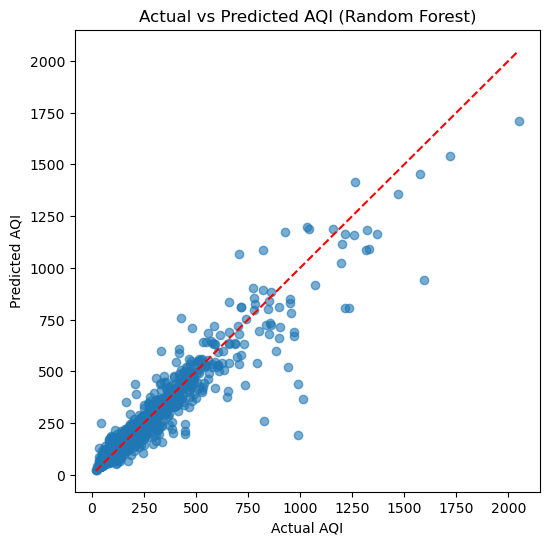

In [13]:
best_model_name = results_df.iloc[0]["Model"]
best_model = models[best_model_name]

y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_best, alpha=0.6)
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title(f"Actual vs Predicted AQI ({best_model_name})")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


### Step 9: Conclusion (Week 2)
- Selected features and target  
- Handled missing values  
- Trained 3 baseline models  
- Evaluated performance using MAE, RMSE, and R²  
- Identified the best model (based on R² score)  

Next Week: Hyperparameter tuning, feature importance analysis, and model optimization.
